## **INTRODUCTIONS**
MBTI is a personality  Myers Briggs Type Indicator is a personality type system that divides personalities into 16 distinct  types across 4 axis:
![](http://www.allkpop.com/upload/2020/03/content/051754/1583448868-chart.png)

Where each person will have a personality abbreviated from the combination of all 4 axis i.e. someone who is introverted, relies more on intuitions, feeling, and perceive rather than judge will be be labelled as an INFP.
The combinations of all these axis creates a more complex traits, strengths, and weaknesses.

![](https://yassinetounsi.com/storage/2021/05/MBTI-Types.jpg)

It is one of, if not the, the most popular personality test in the world. It is used in businesses, online, for fun, for research and lots more. A simple google search reveals all of the different ways the test has been used over time. It’s safe to say that this test is still very relevant in the world in terms of its use.

**==================================================================================================================================================**
**==================================================================================================================================================**

# **Data Pipeline**

In [117]:
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import regex as re
import transformers
from keras import backend as K
import plotly.express as px


data=pd.read_csv('../input/mbti-type/mbti_1.csv')
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [118]:
df1 = pd.read_csv('../input/quotes2/quotes_and_mbti.csv')

In [119]:
df1

,Unnamed: 0.1,Unnamed: 0,level_0,index,Column1,Column2,Column3,Href,Links,Quotes,Quote,25th,mbti
0,5,5,32,88,Aamir Khan,Film actor,"b. March 14, 1965",/author/34281-Aamir_Khan,https://www.azquotes.com/author/34281-Aamir_Khan,0,"['I have had unsuccessful films, but I learned...","A film just doesn't involve actors, a director...",INFJ
1,7,7,47,9,Aaron Eckhart,Film actor,"b. March 12, 1968",/author/4338-Aaron_Eckhart,https://www.azquotes.com/author/4338-Aaron_Eck...,0,"['I think women can be as cruel as men, and me...",Some movies get rushed out right after you mak...,ENFP
2,9,9,65,32,Aaron Paul,Actor,"b. August 27, 1979",/author/26606-Aaron_Paul,https://www.azquotes.com/author/26606-Aaron_Paul,0,"['Wait, so @ToysRUs pulled all of the Breaking...",I have 14 nieces and nephews.,ESFP
3,11,11,73,45,Aaron Sorkin,Screenwriter,"b. June 9, 1961",/author/13883-Aaron_Sorkin,https://www.azquotes.com/author/13883-Aaron_So...,0,"[""Don't ever forget that you're a citizen of t...",Education is the silver bullet. Education is e...,INTJ
4,12,12,77,51,Aaron Taylor-Johnson,Actor,"b. June 13, 1990",/author/62270-Aaron_Taylor_Johnson,https://www.azquotes.com/author/62270-Aaron_Ta...,0,"[""There are so many elements that make a good ...",Something like making the NIT would have been ...,INFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,3913,3913,28357,48,Zoe Kazan,Film actress,"b. September 9, 1983",/author/63147-Zoe_Kazan,https://www.azquotes.com/author/63147-Zoe_Kazan,0,"[""Sometimes I feel that the people I'm writing...",I find playwriting to be incredibly difficult ...,ENFP
1665,3914,3914,28359,50,Zoe Kravitz,Actress,"b. December 1, 1988",/author/8269-Zoe_Kravitz,https://www.azquotes.com/author/8269-Zoe_Kravitz,0,"[""Beauty is when you can appreciate yourself. ...",I'm pretty much a thrift shop gal. Flea market...,ISFP
1666,3916,3916,28363,55,Zoe Saldana,Actress,"b. June 19, 1978",/author/12903-Zoe_Saldana,https://www.azquotes.com/author/12903-Zoe_Saldana,0,['Glamour is about feeling good in your own sk...,I don't understand labels. I don't need anybod...,INFJ
1667,3917,3917,28370,63,Zoey Deutch,Film actress,"b. November 10, 1994",/author/35018-Zoey_Deutch,https://www.azquotes.com/author/35018-Zoey_Deutch,0,['I think being able to really fall in love wi...,"I'm such a fan of Shailene Woodley, so I'm sup...",ENFP


In [120]:
df = df1[['Quote', 'mbti', 'Column2', 'Column3']]

In [121]:
df

,Quote,mbti,Column2,Column3
0,"['I have had unsuccessful films, but I learned...",INFJ,Film actor,"b. March 14, 1965"
1,"['I think women can be as cruel as men, and me...",ENFP,Film actor,"b. March 12, 1968"
2,"['Wait, so @ToysRUs pulled all of the Breaking...",ESFP,Actor,"b. August 27, 1979"
3,"[""Don't ever forget that you're a citizen of t...",INTJ,Screenwriter,"b. June 9, 1961"
4,"[""There are so many elements that make a good ...",INFJ,Actor,"b. June 13, 1990"
...,...,...,...,...
1664,"[""Sometimes I feel that the people I'm writing...",ENFP,Film actress,"b. September 9, 1983"
1665,"[""Beauty is when you can appreciate yourself. ...",ISFP,Actress,"b. December 1, 1988"
1666,['Glamour is about feeling good in your own sk...,INFJ,Actress,"b. June 19, 1978"
1667,['I think being able to really fall in love wi...,ENFP,Film actress,"b. November 10, 1994"


In [122]:
import torch
import pandas as pd
import re
import matplotlib.pyplot as plt


from torch.utils.data import TensorDataset

from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
!pip install transformers
from transformers import BertTokenizer
from transformers import BertForSequenceClassification

In [123]:
data_set = pd.DataFrame()

In [124]:
data_set['type'] = df['mbti']

In [125]:
data_set['post'] = df['Quote']

In [126]:
types = np.unique(np.array(data_set['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [127]:
total = data_set.groupby(['type']).count()*25
total

,post
type,
ENFJ,3025
ENFP,5375
ENTJ,2025
ENTP,3825
ESFJ,2775
ESFP,2950
ESTJ,1225
ESTP,2400
INFJ,3075


Text(0.5, 1.0, 'Total posts for each personality type')

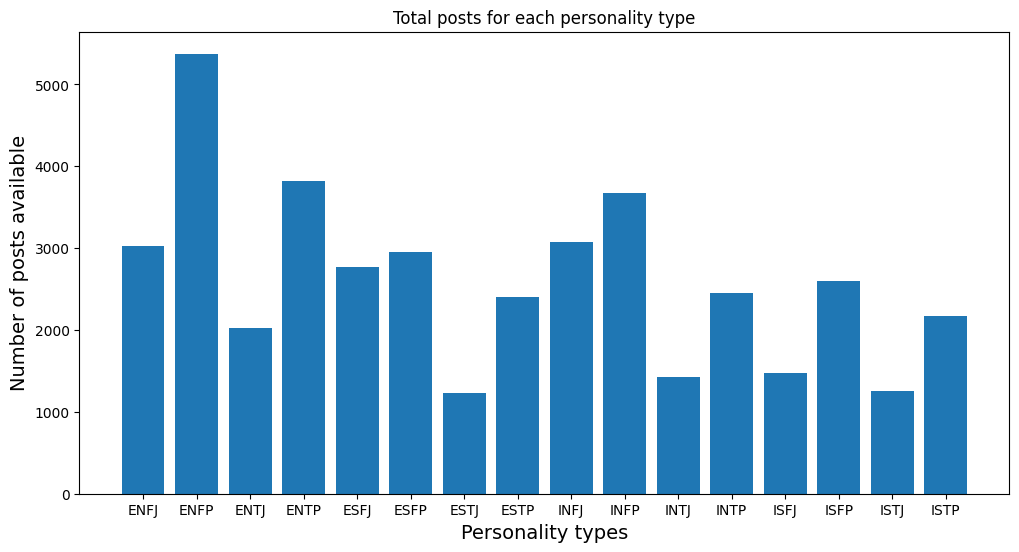

In [128]:
plt.figure(figsize = (12,6))

plt.bar(np.array(total.index), height = total['post'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each personality type')

In [129]:
temp1

1       ['I think women can be as cruel as men, and me...
8       ['Achievement results from work realizing ambi...
17      ["It's what we live for, to be able to make gr...
21      ["In my films I always wanted to make people s...
32      ["My mum always told me I was precious, while ...
                              ...                        
1634    ["Don't chase people. Be yourself, do your own...
1647    ["I don't believe in politics. I'm an anarchis...
1664    ["Sometimes I feel that the people I'm writing...
1667    ['I think being able to really fall in love wi...
1668    ["Always the aim for me is making people feel ...
Name: post, Length: 215, dtype: object

In [130]:
data_set

,type,post
0,INFJ,"['I have had unsuccessful films, but I learned..."
1,ENFP,"['I think women can be as cruel as men, and me..."
2,ESFP,"['Wait, so @ToysRUs pulled all of the Breaking..."
3,INTJ,"[""Don't ever forget that you're a citizen of t..."
4,INFJ,"[""There are so many elements that make a good ..."
...,...,...
1664,ENFP,"[""Sometimes I feel that the people I'm writing..."
1665,ISFP,"[""Beauty is when you can appreciate yourself. ..."
1666,INFJ,['Glamour is about feeling good in your own sk...
1667,ENFP,['I think being able to really fall in love wi...


In [131]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def encode_text(text):
    tokens = tokenizer.tokenize(text)
    if len(tokens) > 512:
        tokens = tokens[:512]  # Truncate tokens if longer than max_seq_length
    input_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = torch.tensor([input_ids])
    
    with torch.no_grad():
        outputs = model(input_ids)
    
    return outputs[0][:, 0, :].numpy()

# Encode each sentence using BERT
encoded_sentences = []
i = 0
for sentence in data_set['post'].values:
    encoded = encode_text(sentence)
    encoded_sentences.append(encoded)
    i=i+1
    print(i)
    


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [132]:
data_set['posts'] = encoded_sentences

In [133]:
data_set

,type,post,posts
0,INFJ,"['I have had unsuccessful films, but I learned...","[[0.6829064, -0.10689653, 0.14960378, 0.163643..."
1,ENFP,"['I think women can be as cruel as men, and me...","[[0.7308627, -0.26258126, 0.09952372, 0.021448..."
2,ESFP,"['Wait, so @ToysRUs pulled all of the Breaking...","[[0.648495, -0.21664779, 0.18271598, 0.1177939..."
3,INTJ,"[""Don't ever forget that you're a citizen of t...","[[0.6491829, -0.22785355, 0.24315017, -0.04724..."
4,INFJ,"[""There are so many elements that make a good ...","[[0.8327894, -0.33498928, 0.28410053, 0.223330..."
...,...,...,...
1664,ENFP,"[""Sometimes I feel that the people I'm writing...","[[0.7286261, -0.55160075, 0.023936832, -0.0858..."
1665,ISFP,"[""Beauty is when you can appreciate yourself. ...","[[0.94356376, -0.35718414, 0.025282426, 0.0388..."
1666,INFJ,['Glamour is about feeling good in your own sk...,"[[0.66833234, -0.19848835, 0.36656445, 0.13548..."
1667,ENFP,['I think being able to really fall in love wi...,"[[0.97540087, -0.12440922, 0.055565484, -0.294..."


In [134]:
data_set['job'] = df['Column2']

In [135]:
data_set

,type,post,posts,job
0,INFJ,"['I have had unsuccessful films, but I learned...","[[0.6829064, -0.10689653, 0.14960378, 0.163643...",Film actor
1,ENFP,"['I think women can be as cruel as men, and me...","[[0.7308627, -0.26258126, 0.09952372, 0.021448...",Film actor
2,ESFP,"['Wait, so @ToysRUs pulled all of the Breaking...","[[0.648495, -0.21664779, 0.18271598, 0.1177939...",Actor
3,INTJ,"[""Don't ever forget that you're a citizen of t...","[[0.6491829, -0.22785355, 0.24315017, -0.04724...",Screenwriter
4,INFJ,"[""There are so many elements that make a good ...","[[0.8327894, -0.33498928, 0.28410053, 0.223330...",Actor
...,...,...,...,...
1664,ENFP,"[""Sometimes I feel that the people I'm writing...","[[0.7286261, -0.55160075, 0.023936832, -0.0858...",Film actress
1665,ISFP,"[""Beauty is when you can appreciate yourself. ...","[[0.94356376, -0.35718414, 0.025282426, 0.0388...",Actress
1666,INFJ,['Glamour is about feeling good in your own sk...,"[[0.66833234, -0.19848835, 0.36656445, 0.13548...",Actress
1667,ENFP,['I think being able to really fall in love wi...,"[[0.97540087, -0.12440922, 0.055565484, -0.294...",Film actress


In [136]:
# Tạo cột mới từ chữ cái đầu tiên của cột 'type'
data_set['EI'] = data_set['type'].apply(lambda x: x[0])
data_set['NS'] = data_set['type'].apply(lambda x: x[1])
data_set['TF'] = data_set['type'].apply(lambda x: x[2])
data_set['PJ'] = data_set['type'].apply(lambda x: x[3])

In [137]:
data_set['EI_int'] = pd.factorize(data_set['EI'])[0]
data_set['NS_int'] = pd.factorize(data_set['NS'])[0]
data_set['TF_int'] = pd.factorize(data_set['TF'])[0]
data_set['PJ_int'] = pd.factorize(data_set['PJ'])[0]


In [138]:
data_set

,type,post,posts,job,EI,NS,TF,PJ,EI_int,NS_int,TF_int,PJ_int
0,INFJ,"['I have had unsuccessful films, but I learned...","[[0.6829064, -0.10689653, 0.14960378, 0.163643...",Film actor,I,N,F,J,0,0,0,0
1,ENFP,"['I think women can be as cruel as men, and me...","[[0.7308627, -0.26258126, 0.09952372, 0.021448...",Film actor,E,N,F,P,1,0,0,1
2,ESFP,"['Wait, so @ToysRUs pulled all of the Breaking...","[[0.648495, -0.21664779, 0.18271598, 0.1177939...",Actor,E,S,F,P,1,1,0,1
3,INTJ,"[""Don't ever forget that you're a citizen of t...","[[0.6491829, -0.22785355, 0.24315017, -0.04724...",Screenwriter,I,N,T,J,0,0,1,0
4,INFJ,"[""There are so many elements that make a good ...","[[0.8327894, -0.33498928, 0.28410053, 0.223330...",Actor,I,N,F,J,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1664,ENFP,"[""Sometimes I feel that the people I'm writing...","[[0.7286261, -0.55160075, 0.023936832, -0.0858...",Film actress,E,N,F,P,1,0,0,1
1665,ISFP,"[""Beauty is when you can appreciate yourself. ...","[[0.94356376, -0.35718414, 0.025282426, 0.0388...",Actress,I,S,F,P,0,1,0,1
1666,INFJ,['Glamour is about feeling good in your own sk...,"[[0.66833234, -0.19848835, 0.36656445, 0.13548...",Actress,I,N,F,J,0,0,0,0
1667,ENFP,['I think being able to really fall in love wi...,"[[0.97540087, -0.12440922, 0.055565484, -0.294...",Film actress,E,N,F,P,1,0,0,1


In [139]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assume 'posts' contains BERT embeddings and 'type_int' contains labels
# X: posts (BERT embeddings), y: type_int labels
X = np.array(data_set['posts'])  # Convert 'posts' column to numpy array
y = np.array(data_set['EI_int'])  # Convert 'type_int' column to numpy array

# Padding sequences if needed
X = pad_sequences(X)  # Padding sequences to make them of equal length

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))  # LSTM layer
model.add(Dense(np.max(y) + 1, activation='softmax'))  # Output layer based on the number of classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
ei4loss, eiaccuracy4 = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


Epoch 1/10
42/42 [==============================] - 3s 17ms/step - loss: 0.6914 - accuracy: 0.5506 - val_loss: 0.6801 - val_accuracy: 0.5808
Epoch 2/10
42/42 [==============================] - 0s 6ms/step - loss: 0.6791 - accuracy: 0.5648 - val_loss: 0.6765 - val_accuracy: 0.5808
Epoch 3/10
42/42 [==============================] - 0s 7ms/step - loss: 0.6724 - accuracy: 0.5790 - val_loss: 0.6776 - val_accuracy: 0.5808
Epoch 4/10
42/42 [==============================] - 0s 6ms/step - loss: 0.6682 - accuracy: 0.5723 - val_loss: 0.6766 - val_accuracy: 0.5928
Epoch 5/10
42/42 [==============================] - 0s 6ms/step - loss: 0.6611 - accuracy: 0.5918 - val_loss: 0.6784 - val_accuracy: 0.5749
Epoch 6/10
42/42 [==============================] - 0s 6ms/step - loss: 0.6548 - accuracy: 0.5970 - val_loss: 0.6895 - val_accuracy: 0.5928
Epoch 7/10
42/42 [==============================] - 0s 6ms/step - loss: 0.6577 - accuracy: 0.5985 - val_loss: 0.6868 - val_accuracy: 0.5988
Epoch 8/10
42/42 [=

In [140]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assume 'posts' contains BERT embeddings and 'type_int' contains labels
# X: posts (BERT embeddings), y: type_int labels
X = np.array(data_set['posts'])  # Convert 'posts' column to numpy array
y = np.array(data_set['NS_int'])  # Convert 'type_int' column to numpy array

# Padding sequences if needed
X = pad_sequences(X)  # Padding sequences to make them of equal length

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))  # LSTM layer
model.add(Dense(np.max(y) + 1, activation='softmax'))  # Output layer based on the number of classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
nsloss4, nsaccuracy4 = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

Epoch 1/20
42/42 [==============================] - 3s 16ms/step - loss: 0.6688 - accuracy: 0.5993 - val_loss: 0.6657 - val_accuracy: 0.5778
Epoch 2/20
42/42 [==============================] - 0s 6ms/step - loss: 0.6531 - accuracy: 0.6135 - val_loss: 0.6570 - val_accuracy: 0.5808
Epoch 3/20
42/42 [==============================] - 0s 6ms/step - loss: 0.6415 - accuracy: 0.6367 - val_loss: 0.6628 - val_accuracy: 0.5808
Epoch 4/20
42/42 [==============================] - 0s 6ms/step - loss: 0.6392 - accuracy: 0.6315 - val_loss: 0.6886 - val_accuracy: 0.5868
Epoch 5/20
42/42 [==============================] - 0s 6ms/step - loss: 0.6313 - accuracy: 0.6607 - val_loss: 0.6758 - val_accuracy: 0.5808
Epoch 6/20
42/42 [==============================] - 0s 6ms/step - loss: 0.6203 - accuracy: 0.6517 - val_loss: 0.6770 - val_accuracy: 0.5719
Epoch 7/20
42/42 [==============================] - 0s 7ms/step - loss: 0.6211 - accuracy: 0.6554 - val_loss: 0.6898 - val_accuracy: 0.5808
Epoch 8/20
42/42 [=

In [141]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assume 'posts' contains BERT embeddings and 'type_int' contains labels
# X: posts (BERT embeddings), y: type_int labels
X = np.array(data_set['posts'])  # Convert 'posts' column to numpy array
y = np.array(data_set['TF_int'])  # Convert 'type_int' column to numpy array

# Padding sequences if needed
X = pad_sequences(X)  # Padding sequences to make them of equal length

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))  # LSTM layer
model.add(Dense(np.max(y) + 1, activation='softmax'))  # Output layer based on the number of classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
tfloss4, tfaccuracy4 = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

Epoch 1/20
42/42 [==============================] - 2s 16ms/step - loss: 0.6758 - accuracy: 0.5940 - val_loss: 0.6713 - val_accuracy: 0.5928
Epoch 2/20
42/42 [==============================] - 0s 6ms/step - loss: 0.6521 - accuracy: 0.6090 - val_loss: 0.6687 - val_accuracy: 0.6018
Epoch 3/20
42/42 [==============================] - 0s 6ms/step - loss: 0.6410 - accuracy: 0.6517 - val_loss: 0.6922 - val_accuracy: 0.6018
Epoch 4/20
42/42 [==============================] - 0s 7ms/step - loss: 0.6377 - accuracy: 0.6217 - val_loss: 0.6843 - val_accuracy: 0.6108
Epoch 5/20
42/42 [==============================] - 0s 6ms/step - loss: 0.6245 - accuracy: 0.6532 - val_loss: 0.6853 - val_accuracy: 0.5539
Epoch 6/20
42/42 [==============================] - 0s 6ms/step - loss: 0.6172 - accuracy: 0.6652 - val_loss: 0.6946 - val_accuracy: 0.5719
Epoch 7/20
42/42 [==============================] - 0s 6ms/step - loss: 0.6144 - accuracy: 0.6562 - val_loss: 0.7074 - val_accuracy: 0.5958
Epoch 8/20
42/42 [=

In [142]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assume 'posts' contains BERT embeddings and 'type_int' contains labels
# X: posts (BERT embeddings), y: type_int labels
X = np.array(data_set['posts'])  # Convert 'posts' column to numpy array
y = np.array(data_set['PJ_int'])  # Convert 'type_int' column to numpy array

# Padding sequences if needed
X = pad_sequences(X)  # Padding sequences to make them of equal length

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))  # LSTM layer
model.add(Dense(np.max(y) + 1, activation='softmax'))  # Output layer based on the number of classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
pjloss4, pjaccuracy4 = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

Epoch 1/20
42/42 [==============================] - 4s 17ms/step - loss: 0.6694 - accuracy: 0.5955 - val_loss: 0.6579 - val_accuracy: 0.6198
Epoch 2/20
42/42 [==============================] - 0s 7ms/step - loss: 0.6614 - accuracy: 0.6075 - val_loss: 0.6640 - val_accuracy: 0.6377
Epoch 3/20
42/42 [==============================] - 0s 7ms/step - loss: 0.6593 - accuracy: 0.6202 - val_loss: 0.6582 - val_accuracy: 0.6168
Epoch 4/20
42/42 [==============================] - 0s 7ms/step - loss: 0.6471 - accuracy: 0.6202 - val_loss: 0.6468 - val_accuracy: 0.6377
Epoch 5/20
42/42 [==============================] - 0s 6ms/step - loss: 0.6418 - accuracy: 0.6232 - val_loss: 0.6479 - val_accuracy: 0.6287
Epoch 6/20
42/42 [==============================] - 0s 7ms/step - loss: 0.6366 - accuracy: 0.6322 - val_loss: 0.6471 - val_accuracy: 0.5988
Epoch 7/20
42/42 [==============================] - 0s 7ms/step - loss: 0.6336 - accuracy: 0.6397 - val_loss: 0.6644 - val_accuracy: 0.5958
Epoch 8/20
42/42 [=

In [144]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Chuẩn bị dữ liệu văn bản và nhãn tương ứng
texts = data_set['post'].values  # Danh sách các văn bản
labels = data_set['EI_int'].values  # Danh sách các nhãn (0 hoặc 1)

# Sử dụng TF-IDF để chuyển đổi văn bản thành ma trận TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Số lượng từ tối đa
text_vectors = tfidf_vectorizer.fit_transform(texts)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(text_vectors, labels, test_size=0.2, random_state=42)

# Xây dựng mô hình XGBoost
model1 = xgb.XGBClassifier()

# Huấn luyện mô hình
model1.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
eiaccuracy1 = model1.score(X_test, y_test)
print("Accuracy wirth XGBoost:", accuracy)

# Xây dựng mô hình LightGBM
model2 = lgb.LGBMClassifier()

# Huấn luyện mô hình
model2.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
eiaccuracy2 = model2.score(X_test, y_test)
print("Accuracy with LightGBM:", accuracy)

# Xây dựng mô hình CatBoost
model3 = CatBoostClassifier()

# Huấn luyện mô hình
model3.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
eiaccuracy3 = model3.score(X_test, y_test)
print("Accuracy with CatBoost:", accuracy)

from sklearn.metrics import log_loss

# Calculate log loss for XGBoost
y_pred_proba_xgb = model1.predict_proba(X_test)
eiloss1 = log_loss(y_test, y_pred_proba_xgb)
print("Log Loss with XGBoost:", eiloss1)

# Calculate log loss for LightGBM
y_pred_proba_lgb = model2.predict_proba(X_test)
eiloss2 = log_loss(y_test, y_pred_proba_lgb)
print("Log Loss with LightGBM:", eiloss2)

# Calculate log loss for CatBoost
y_pred_proba_catboost = model3.predict_proba(X_test)
eiloss3 = log_loss(y_test, y_pred_proba_catboost)
print("Log Loss with CatBoost:", eiloss3)


Accuracy wirth XGBoost: 0.6197604790419161
Accuracy with LightGBM: 0.6197604790419161
Learning rate set to 0.011655
0:	learn: 0.6923920	total: 72ms	remaining: 1m 11s
1:	learn: 0.6917249	total: 128ms	remaining: 1m 3s
2:	learn: 0.6911916	total: 186ms	remaining: 1m 1s
3:	learn: 0.6905764	total: 241ms	remaining: 1m
4:	learn: 0.6897231	total: 298ms	remaining: 59.3s
5:	learn: 0.6891723	total: 352ms	remaining: 58.4s
6:	learn: 0.6884900	total: 409ms	remaining: 58.1s
7:	learn: 0.6876332	total: 464ms	remaining: 57.5s
8:	learn: 0.6869956	total: 518ms	remaining: 57.1s
9:	learn: 0.6862528	total: 573ms	remaining: 56.7s
10:	learn: 0.6854587	total: 629ms	remaining: 56.5s
11:	learn: 0.6846941	total: 684ms	remaining: 56.3s
12:	learn: 0.6838125	total: 740ms	remaining: 56.2s
13:	learn: 0.6832914	total: 795ms	remaining: 56s
14:	learn: 0.6826676	total: 852ms	remaining: 55.9s
15:	learn: 0.6821232	total: 909ms	remaining: 55.9s
16:	learn: 0.6813063	total: 965ms	remaining: 55.8s
17:	learn: 0.6805819	total: 1.02

In [145]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Chuẩn bị dữ liệu văn bản và nhãn tương ứng
texts = data_set['post'].values  # Danh sách các văn bản
labels = data_set['NS_int'].values  # Danh sách các nhãn (0 hoặc 1)

# Sử dụng TF-IDF để chuyển đổi văn bản thành ma trận TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Số lượng từ tối đa
text_vectors = tfidf_vectorizer.fit_transform(texts)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(text_vectors, labels, test_size=0.2, random_state=42)

# Xây dựng mô hình XGBoost
model1 = xgb.XGBClassifier()

# Huấn luyện mô hình
model1.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
nsaccuracy1 = model1.score(X_test, y_test)
print("Accuracy wirth XGBoost:", accuracy)

# Xây dựng mô hình LightGBM
model2 = lgb.LGBMClassifier()

# Huấn luyện mô hình
model2.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
nsaccuracy2 = model2.score(X_test, y_test)
print("Accuracy with LightGBM:", accuracy)

# Xây dựng mô hình CatBoost
model3 = CatBoostClassifier()

# Huấn luyện mô hình
model3.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
nsaccuracy3 = model3.score(X_test, y_test)
print("Accuracy with CatBoost:", accuracy)

from sklearn.metrics import log_loss

# Calculate log loss for XGBoost
y_pred_proba_xgb = model1.predict_proba(X_test)
nsloss1 = log_loss(y_test, y_pred_proba_xgb)
print("Log Loss with XGBoost:", nsloss1)

# Calculate log loss for LightGBM
y_pred_proba_lgb = model2.predict_proba(X_test)
nsloss2 = log_loss(y_test, y_pred_proba_lgb)
print("Log Loss with LightGBM:", nsloss2)

# Calculate log loss for CatBoost
y_pred_proba_catboost = model3.predict_proba(X_test)
nsloss3 = log_loss(y_test, y_pred_proba_catboost)
print("Log Loss with CatBoost:", nsloss3)



Accuracy wirth XGBoost: 0.6197604790419161
Accuracy with LightGBM: 0.6197604790419161
Learning rate set to 0.011655
0:	learn: 0.6921161	total: 76.8ms	remaining: 1m 16s
1:	learn: 0.6912793	total: 133ms	remaining: 1m 6s
2:	learn: 0.6905469	total: 191ms	remaining: 1m 3s
3:	learn: 0.6897851	total: 247ms	remaining: 1m 1s
4:	learn: 0.6887862	total: 304ms	remaining: 1m
5:	learn: 0.6876077	total: 359ms	remaining: 59.5s
6:	learn: 0.6866251	total: 415ms	remaining: 58.9s
7:	learn: 0.6854288	total: 473ms	remaining: 58.7s
8:	learn: 0.6846716	total: 529ms	remaining: 58.3s
9:	learn: 0.6838024	total: 586ms	remaining: 58s
10:	learn: 0.6826452	total: 644ms	remaining: 57.9s
11:	learn: 0.6814526	total: 698ms	remaining: 57.5s
12:	learn: 0.6804934	total: 754ms	remaining: 57.2s
13:	learn: 0.6793193	total: 809ms	remaining: 57s
14:	learn: 0.6780388	total: 867ms	remaining: 56.9s
15:	learn: 0.6767821	total: 924ms	remaining: 56.9s
16:	learn: 0.6756944	total: 980ms	remaining: 56.7s
17:	learn: 0.6746845	total: 1.04

In [146]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Chuẩn bị dữ liệu văn bản và nhãn tương ứng
texts = data_set['post'].values  # Danh sách các văn bản
labels = data_set['TF_int'].values  # Danh sách các nhãn (0 hoặc 1)

# Sử dụng TF-IDF để chuyển đổi văn bản thành ma trận TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Số lượng từ tối đa
text_vectors = tfidf_vectorizer.fit_transform(texts)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(text_vectors, labels, test_size=0.2, random_state=42)

# Xây dựng mô hình XGBoost
model1 = xgb.XGBClassifier()

# Huấn luyện mô hình
model1.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
tfaccuracy1 = model1.score(X_test, y_test)
print("Accuracy wirth XGBoost:", accuracy)

# Xây dựng mô hình LightGBM
model2 = lgb.LGBMClassifier()

# Huấn luyện mô hình
model2.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
tfaccuracy2 = model2.score(X_test, y_test)
print("Accuracy with LightGBM:", accuracy)

# Xây dựng mô hình CatBoost
model3 = CatBoostClassifier()

# Huấn luyện mô hình
model3.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
tfaccuracy3 = model3.score(X_test, y_test)
print("Accuracy with CatBoost:", accuracy)

from sklearn.metrics import log_loss

# Calculate log loss for XGBoost
y_pred_proba_xgb = model1.predict_proba(X_test)
tfloss1 = log_loss(y_test, y_pred_proba_xgb)
print("Log Loss with XGBoost:", tfloss1)

# Calculate log loss for LightGBM
y_pred_proba_lgb = model2.predict_proba(X_test)
tfloss2 = log_loss(y_test, y_pred_proba_lgb)
print("Log Loss with LightGBM:", tfloss2)

# Calculate log loss for CatBoost
y_pred_proba_catboost = model3.predict_proba(X_test)
tfloss3 = log_loss(y_test, y_pred_proba_catboost)
print("Log Loss with CatBoost:", tfloss3)



Accuracy wirth XGBoost: 0.6197604790419161
Accuracy with LightGBM: 0.6197604790419161
Learning rate set to 0.011655
0:	learn: 0.6920162	total: 72.8ms	remaining: 1m 12s
1:	learn: 0.6910221	total: 129ms	remaining: 1m 4s
2:	learn: 0.6894722	total: 188ms	remaining: 1m 2s
3:	learn: 0.6882577	total: 246ms	remaining: 1m 1s
4:	learn: 0.6873939	total: 302ms	remaining: 1m
5:	learn: 0.6861953	total: 359ms	remaining: 59.5s
6:	learn: 0.6849801	total: 416ms	remaining: 59s
7:	learn: 0.6840178	total: 472ms	remaining: 58.6s
8:	learn: 0.6831163	total: 529ms	remaining: 58.2s
9:	learn: 0.6822043	total: 585ms	remaining: 57.9s
10:	learn: 0.6811975	total: 641ms	remaining: 57.7s
11:	learn: 0.6800420	total: 698ms	remaining: 57.4s
12:	learn: 0.6788758	total: 754ms	remaining: 57.2s
13:	learn: 0.6780246	total: 811ms	remaining: 57.1s
14:	learn: 0.6768265	total: 868ms	remaining: 57s
15:	learn: 0.6757812	total: 924ms	remaining: 56.8s
16:	learn: 0.6749336	total: 979ms	remaining: 56.6s
17:	learn: 0.6741835	total: 1.03

In [147]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Chuẩn bị dữ liệu văn bản và nhãn tương ứng
texts = data_set['post'].values  # Danh sách các văn bản
labels = data_set['PJ_int'].values  # Danh sách các nhãn (0 hoặc 1)

# Sử dụng TF-IDF để chuyển đổi văn bản thành ma trận TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Số lượng từ tối đa
text_vectors = tfidf_vectorizer.fit_transform(texts)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(text_vectors, labels, test_size=0.2, random_state=42)

# Xây dựng mô hình XGBoost
model1 = xgb.XGBClassifier()

# Huấn luyện mô hình
model1.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
pjaccuracy1 = model1.score(X_test, y_test)
print("Accuracy wirth XGBoost:", accuracy)

# Xây dựng mô hình LightGBM
model2 = lgb.LGBMClassifier()

# Huấn luyện mô hình
model2.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
pjaccuracy2 = model2.score(X_test, y_test)
print("Accuracy with LightGBM:", accuracy)

# Xây dựng mô hình CatBoost
model3 = CatBoostClassifier()

# Huấn luyện mô hình
model3.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
pjaccuracy3 = model3.score(X_test, y_test)
print("Accuracy with CatBoost:", accuracy)

from sklearn.metrics import log_loss

# Calculate log loss for XGBoost
y_pred_proba_xgb = model1.predict_proba(X_test)
pjloss1 = log_loss(y_test, y_pred_proba_xgb)
print("Log Loss with XGBoost:", pjloss1)

# Calculate log loss for LightGBM
y_pred_proba_lgb = model2.predict_proba(X_test)
pjloss2 = log_loss(y_test, y_pred_proba_lgb)
print("Log Loss with LightGBM:", pjloss2)

# Calculate log loss for CatBoost
y_pred_proba_catboost = model3.predict_proba(X_test)
pjloss3 = log_loss(y_test, y_pred_proba_catboost)
print("Log Loss with CatBoost:", pjloss3)



Accuracy wirth XGBoost: 0.6197604790419161
Accuracy with LightGBM: 0.6197604790419161
Learning rate set to 0.011655
0:	learn: 0.6921110	total: 67.1ms	remaining: 1m 7s
1:	learn: 0.6911586	total: 122ms	remaining: 1m
2:	learn: 0.6898068	total: 180ms	remaining: 59.8s
3:	learn: 0.6886725	total: 238ms	remaining: 59.3s
4:	learn: 0.6874251	total: 295ms	remaining: 58.7s
5:	learn: 0.6865702	total: 350ms	remaining: 58s
6:	learn: 0.6850986	total: 408ms	remaining: 57.9s
7:	learn: 0.6843402	total: 464ms	remaining: 57.5s
8:	learn: 0.6833492	total: 520ms	remaining: 57.3s
9:	learn: 0.6822099	total: 575ms	remaining: 56.9s
10:	learn: 0.6809416	total: 632ms	remaining: 56.8s
11:	learn: 0.6795968	total: 689ms	remaining: 56.7s
12:	learn: 0.6784980	total: 746ms	remaining: 56.6s
13:	learn: 0.6775725	total: 800ms	remaining: 56.4s
14:	learn: 0.6763668	total: 857ms	remaining: 56.3s
15:	learn: 0.6755298	total: 913ms	remaining: 56.1s
16:	learn: 0.6746394	total: 970ms	remaining: 56.1s
17:	learn: 0.6735581	total: 1.0

In [160]:
import pandas as pd

# Tạo một từ điển chứa dữ liệu
data = {
    'Algorithm': ['XGBoost', 'LightGBM', 'CatBoost', 'RNN'],
    'E-I Accuracy': [100*eiaccuracy1, 100*eiaccuracy2, 100*eiaccuracy3, 100*eiaccuracy4],
    'T-F Accuracy': [100*tfaccuracy1, 100*tfaccuracy2, 100*tfaccuracy3, 100*tfaccuracy4],
    'N-S Accuracy': [100*nsaccuracy1, 100*nsaccuracy2, 100*nsaccuracy3, 100*nsaccuracy4],
    'P-J Accuracy': [100*pjaccuracy1, 100*pjaccuracy2, 100*pjaccuracy3, 100*pjaccuracy4]
}

# Tạo DataFrame từ từ điển dữ liệu
df_acc = pd.DataFrame(data)




In [150]:
import pandas as pd

# Tạo một từ điển chứa dữ liệu
data = {
    'Algorithm': ['XGBoost', 'LightGBM', 'CatBoost', 'RNN'],
    'E-I Accuracy': [eiloss1, eiloss2, eiloss3, ei4loss],
    'T-F Accuracy': [tfloss1, tfloss2, tfloss3, tfloss4],
    'N-S Accuracy': [nsloss1, nsloss2, nsloss3, nsloss4],
    'P-J Accuracy': [pjloss1, pjloss2, pjloss3, pjloss4]
}

# Tạo DataFrame từ từ điển dữ liệu
df_loss = pd.DataFrame(data)


In [152]:
df_acc1 = pd.read_csv('/kaggle/input/naivebayes/NBacc.csv')

In [153]:
df_loss1 = pd.read_csv("/kaggle/input/naivebayes/NBloss.csv")

In [155]:
df_acc1

,Unnamed: 0,Algorithm,E-I Accuracy,T-F Accuracy,N-S Accuracy,P-J Accuracy
0,0,NB,57.692308,65.384615,54.831933,52.24359


In [161]:
df_acc2 = pd.concat([df_acc, df_acc1], ignore_index=True)

In [162]:
df_acc2

,Algorithm,E-I Accuracy,T-F Accuracy,N-S Accuracy,P-J Accuracy,Unnamed: 0
0,XGBoost,58.083832,58.083832,66.167665,61.976048,NaN
1,LightGBM,56.886228,61.676647,64.371257,62.874251,NaN
2,CatBoost,58.982036,63.173653,65.868263,64.970060,NaN
3,RNN,55.988026,58.982038,56.586826,56.586826,NaN
4,NB,57.692308,65.384615,54.831933,52.243590,0.0


In [163]:
df_loss2 = pd.concat([df_loss, df_loss1], ignore_index=True)

In [164]:
df_loss2

,Algorithm,E-I Accuracy,T-F Accuracy,N-S Accuracy,P-J Accuracy,Unnamed: 0
0,XGBoost,0.880047,0.915835,0.850713,0.865205,NaN
1,LightGBM,0.781067,0.774443,0.714391,0.739181,NaN
2,CatBoost,0.671540,0.632344,0.628399,0.637227,NaN
3,RNN,0.705205,0.764827,0.760964,0.710293,NaN
4,NB,0.000227,0.439297,0.598688,0.643488,0.0
